#### Importing Necessary Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Collection and Analysis

In [2]:
dataset = pd.read_csv("C:/Users/D/Downloads/archive (1)/insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Data Cleaning

In [6]:
# Checking null Values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Checking for Duplicate Values
dataset.duplicated().sum()

np.int64(1)

In [8]:
# Removing Duplicate Value
dataset.drop_duplicates(keep = "first")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data Analysis

In [9]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# From dataset we can analyze that Age, Smoker and Region are Categorical Values

#### Visualizing data through Graphs

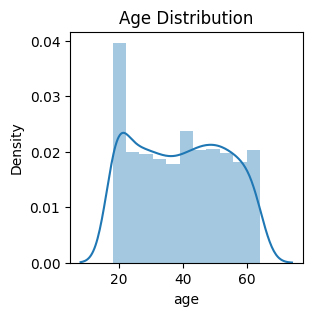

In [98]:
# distribution of age value
plt.figure(figsize=(3,3))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

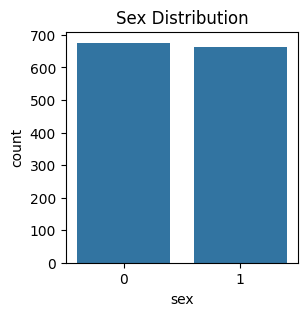

In [99]:
# Gender column
plt.figure(figsize=(3,3))
sns.countplot(x='sex', data= dataset)
plt.title('Sex Distribution')
plt.show()

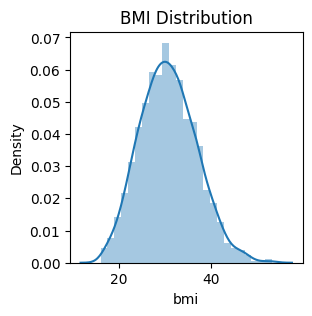

In [100]:
# bmi distribution
plt.figure(figsize=(3,3))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

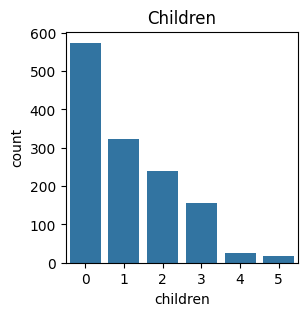

In [101]:
# children column
plt.figure(figsize=(3,3))
sns.countplot(x='children', data= dataset)
plt.title('Children')
plt.show()

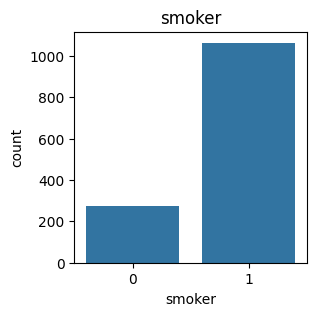

In [102]:
# smoker column
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data= dataset)
plt.title('smoker')
plt.show()

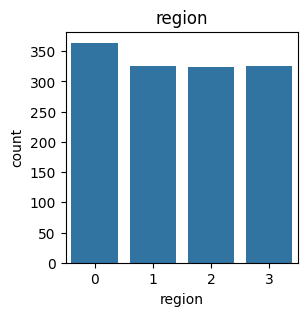

In [103]:
# region column
plt.figure(figsize=(3,3))
sns.countplot(x='region', data= dataset)
plt.title('region')
plt.show()

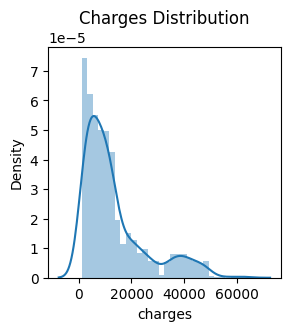

In [104]:
# distribution of charges value
plt.figure(figsize=(3,3))
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

#### Data Preprocessing

In [18]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
dataset["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
# Encoding of Categorical Data
# encoding sex column
dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

#### Splitting the Dataset into Dependent and Independent Variables

In [23]:
x = dataset.iloc[:,:-1]      # Features
y = dataset['charges']       # Target

In [24]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Splitting the Data into Training and Testing Datasets

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

#### Training Model using Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [92]:
regressor.score(x_train, y_train)*100     # Accuracy with Training Dataset

74.13131194887536

In [93]:
regressor.score(x_test, y_test)*100       # Accuracy with Testing Dataset

78.3021587162344

In [94]:
# Accuracy of our model is not that much good. Our model is Underfitted.

#### Training Model Using Decision Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth= 4)
dtregressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [96]:
dtregressor.score(x_train, y_train)*100     # Accuracy with Training Dataset

86.53110840097294

In [97]:
dtregressor.score(x_test, y_test)*100       # Accuracy with Testing Dataset

86.41310379678357

##### Decision Tree is giving us better accuracy than Linear Regression that too Without Underfitting and Overfitting. So we are going to use Decision Tree for Predictions.

#### Building a Predictive System

In [75]:
input_data = (18,1,36.850,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtregressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[2757.94556798]
The insurance cost is USD  2757.945567982454
